#### Using Sklearn implementation of DBSCAN

In [17]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

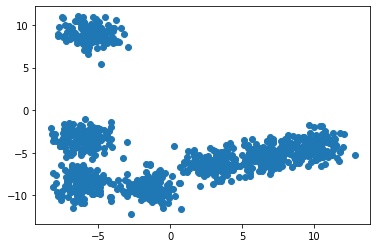

In [2]:
# making sample dataset
X,y=make_blobs(n_samples=1000,centers=7,n_features=2,random_state=799)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [3]:
# initialize dbscan 
db=DBSCAN(eps=0.5,min_samples=10,metric="euclidean")

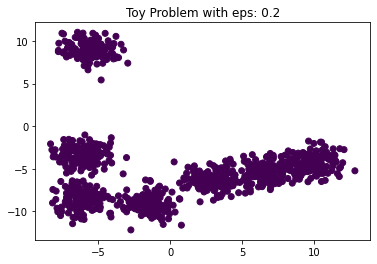

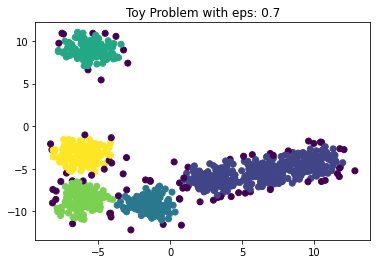

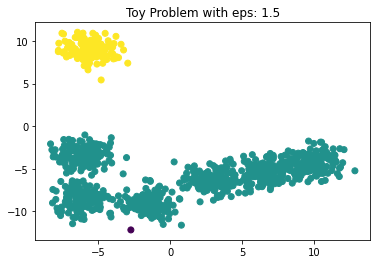

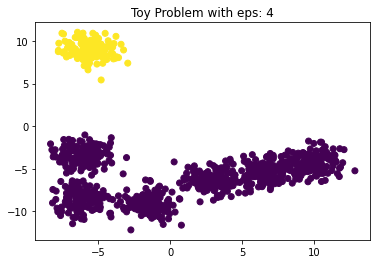

In [4]:
# To experiment with various neighbors make a list & iterate over it
eps=[0.2,0.7,1.5,4]
for ep in eps:
    db=DBSCAN(eps=ep,min_samples=10,metric='euclidean')
    plt.scatter(X[:,0], X[:,1], c=db.fit_predict(X))
    plt.title('Toy Problem with eps: ' + str(ep))
    plt.show()

##### setting our neighborhood size too small will cause everything to be seen as random noise (purple points). Bumping our neighborhood size up a little bit allows us to form clusters that make more sense.

##### Evaluating the effect of minimum number of points.

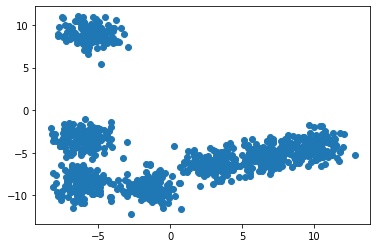

In [5]:
# Visualizing the data again
plt.scatter(X[:,0],X[:,1])
plt.show()

In [7]:
# initialing a dbscan instance , I chose 0.7 based on previous evaluation
db = DBSCAN(eps=0.7, min_samples=10, metric='euclidean')

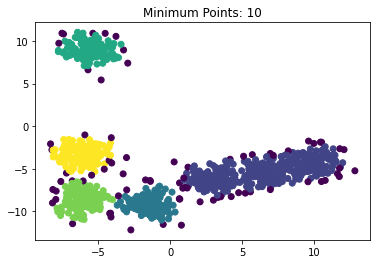

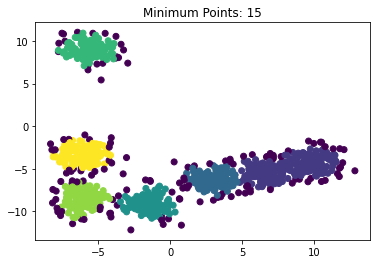

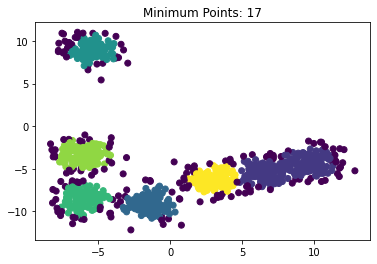

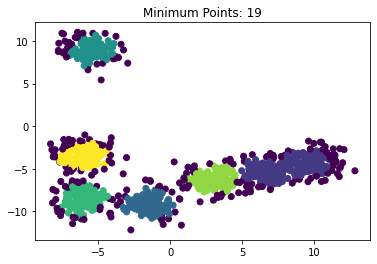

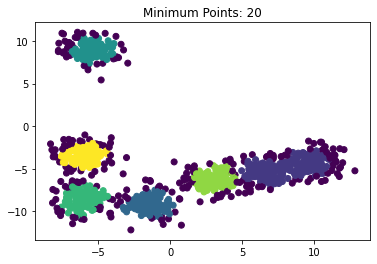

In [8]:
# checking effect of number of samples
num_samples=[10,15,17,19,20]
for min_num in num_samples:
    db=DBSCAN(eps=0.7,min_samples=min_num,metric='euclidean')
    plt.scatter(X[:,0], X[:,1], c=db.fit_predict(X))
    plt.title('Minimum Points: ' + str(min_num))
    plt.show()

##### One can now tweak both epsilon and minimum points thresholding in scikit-learn implementation to achieve the optimal number of clusters.

#### Implementing DBSCAN from scratch.

In [9]:
# Making the sample data again
X_blob, y_blob = make_blobs(n_samples=500, centers=4, n_features=2, random_state=800)

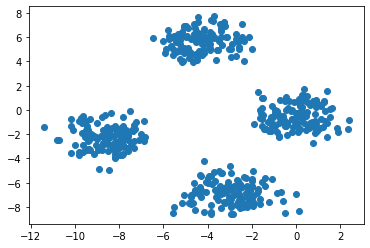

In [11]:
# Visualizing data
plt.scatter(X_blob[:,0],X_blob[:,1])
plt.show()

In [18]:
# Defining the function for DBSCAN
def DBSCAN_Scratch(x,eps,min_pts):
    """ 
    param x (list of vectors): your dataset to be clustered
    param eps (float): neighborhood radius threshold 
    param min_pts (int): minimum number of points threshold for a 
    neighborhood to be a cluster 
    """
    # building label holder of all 0's
    labels=[0]*X_blob.shape[0]
    # start custom cluster id
    c=0
    # for each point index p in dataset
    for p in range(0,x.shape[0]):
        # Evaluate unvisited points as neighborhood centers
        if not(labels[p]==0):
            continue
        neighbors=neighborhood_search(x,p,eps)
        # If enough neighbors are not there classify it as noise(-1)
        #  otherwise use this point as neighborhood cluster
        if len(neighbors)<min_pts:
            labels[p]=-1
        else:
            c+=1
            neighbor_cluster(x,labels,p,neighbors,c,eps,min_pts)
    return labels

def neighbor_cluster(x, labels, p, neighbors, C, eps, min_pts):

    # Assign the cluster label to original point 
    labels[p] = C 
     
    # Look at each neighbor of p (by index, not the points themselves) and
    #evaluate
    i = 0
    while i < len(neighbors):
        # Get the next point from the queue.
        potential_neighbor_ix = neighbors[i]
        # If potential_neighbor_ix is noise from previous runs, we can assign it to current cluster 
        if labels[potential_neighbor_ix] == -1: 
            labels[potential_neighbor_ix] = C 
         
        # Otherwise, if potential_neighbor_ix is unvisited, we can add it to current cluster 
        elif labels[potential_neighbor_ix] == 0: 
            labels[potential_neighbor_ix] = C 
             
            # Further find neighbors of potential neighbor 
            potential_neighbors_cluster = neighborhood_search(x, potential_neighbor_ix, eps) 
             
            if len(potential_neighbors_cluster) >= min_pts: 
                neighbors = neighbors + potential_neighbors_cluster       
         
        # Evaluate next neighbor 
        i += 1         

def neighborhood_search(x, p, eps): 
    neighbors = [] 
     
    # For each point in the dataset... 
    for potential_neighbor in range(0, x.shape[0]): 
         
        # If a nearby point falls below the neighborhood radius threshold, add to neighbors list 
        if np.linalg.norm(x[p] - x[potential_neighbor]) < eps: 
            neighbors.append(potential_neighbor) 
             
    return neighbors

In [19]:
labels = DBSCAN_Scratch(X_blob, 0.6, 5)

##### Different values can be passed to DBSCAN_Scratch method to obtain differemt clusters

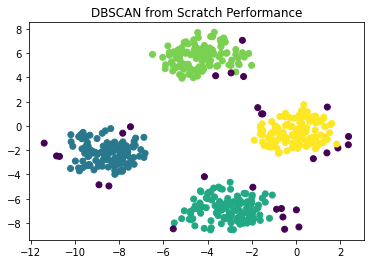

In [20]:
plt.scatter(X_blob[:,0], X_blob[:,1], c=labels)
plt.title("DBSCAN from Scratch Performance")
plt.show()